# 03 Model

## Aims

Test different basic models to determine best model for further optimisation
weak learners:
* KNN
* Decision Tree
* Logistic Regression
* SVM
* Naive Bayes

determine AUC, f1 score and confusion matrix

## Import libraries

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, classification_report
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
import warnings
warnings.simplefilter('ignore')



In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree

# for gridsearch
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

## Data Preprocessing

In [8]:
df = pd.read_csv('data/train.csv')
df.head(10)

,disrict,client_catg,region,target,1transactions_count,consommation_level_1_mean,consommation_level_2_mean,consommation_level_3_mean,consommation_level_4_mean,tarif_type_mean,counter_number_mean,counter_statue_mode,counter_code_mean,reading_remarque_mean,counter_coefficient_mean,delta_index_mean,months_number_mean,counter_type_mode
0,60,11,101,0.0,35.0,352.400000,10.571429,0.000000,0.000000,11.000000,1.335667e+06,0,203.685714,6.971429,1.0,362.971429,4.628571,0
1,69,11,107,0.0,37.0,557.540541,0.000000,0.000000,0.000000,11.000000,6.789020e+05,0,203.000000,7.216216,1.0,557.540541,4.324324,0
2,62,11,301,0.0,18.0,798.611111,37.888889,0.000000,0.000000,11.000000,5.727650e+05,0,203.222222,7.055556,1.0,836.500000,6.444444,0
3,69,11,105,0.0,20.0,1.200000,0.000000,0.000000,0.000000,11.000000,2.078000e+03,0,413.000000,6.150000,1.0,1.200000,4.200000,0
4,62,11,303,0.0,14.0,663.714286,104.857143,117.357143,36.714286,11.000000,1.957500e+04,0,207.000000,8.857143,1.0,922.642857,3.714286,0
5,69,11,103,0.0,48.0,352.104167,10.437500,3.770833,0.000000,22.479167,8.149729e+05,0,124.625000,7.708333,1.0,366.312500,4.000000,0
6,62,11,309,0.0,40.0,280.025000,6.550000,0.000000,0.000000,25.500000,4.446350e+04,0,209.000000,7.975000,1.0,286.575000,3.700000,[0 1]
7,60,11,101,0.0,78.0,327.500000,0.923077,0.000000,0.000000,25.128205,5.904181e+05,0,106.538462,7.025641,1.0,328.423077,3.871795,0
8,62,11,301,0.0,2.0,112.500000,0.000000,0.000000,0.000000,11.000000,1.441290e+05,0,413.000000,7.500000,1.0,112.500000,4.000000,0
9,60,11,101,0.0,5.0,850.800000,1629.200000,320.000000,4882.000000,11.000000,5.868000e+05,0,467.000000,9.000000,1.0,7682.000000,4.000000,0


Preprocessing of Data

In [9]:
# dropping counter_statue_mode and counter_type_mode
df_original = df
df.drop(['counter_type_mode', 'counter_statue_mode'], axis=1, inplace=True)
df.head(10)

,disrict,client_catg,region,target,1transactions_count,consommation_level_1_mean,consommation_level_2_mean,consommation_level_3_mean,consommation_level_4_mean,tarif_type_mean,counter_number_mean,counter_code_mean,reading_remarque_mean,counter_coefficient_mean,delta_index_mean,months_number_mean
0,60,11,101,0.0,35.0,352.400000,10.571429,0.000000,0.000000,11.000000,1.335667e+06,203.685714,6.971429,1.0,362.971429,4.628571
1,69,11,107,0.0,37.0,557.540541,0.000000,0.000000,0.000000,11.000000,6.789020e+05,203.000000,7.216216,1.0,557.540541,4.324324
2,62,11,301,0.0,18.0,798.611111,37.888889,0.000000,0.000000,11.000000,5.727650e+05,203.222222,7.055556,1.0,836.500000,6.444444
3,69,11,105,0.0,20.0,1.200000,0.000000,0.000000,0.000000,11.000000,2.078000e+03,413.000000,6.150000,1.0,1.200000,4.200000
4,62,11,303,0.0,14.0,663.714286,104.857143,117.357143,36.714286,11.000000,1.957500e+04,207.000000,8.857143,1.0,922.642857,3.714286
5,69,11,103,0.0,48.0,352.104167,10.437500,3.770833,0.000000,22.479167,8.149729e+05,124.625000,7.708333,1.0,366.312500,4.000000
6,62,11,309,0.0,40.0,280.025000,6.550000,0.000000,0.000000,25.500000,4.446350e+04,209.000000,7.975000,1.0,286.575000,3.700000
7,60,11,101,0.0,78.0,327.500000,0.923077,0.000000,0.000000,25.128205,5.904181e+05,106.538462,7.025641,1.0,328.423077,3.871795
8,62,11,301,0.0,2.0,112.500000,0.000000,0.000000,0.000000,11.000000,1.441290e+05,413.000000,7.500000,1.0,112.500000,4.000000
9,60,11,101,0.0,5.0,850.800000,1629.200000,320.000000,4882.000000,11.000000,5.868000e+05,467.000000,9.000000,1.0,7682.000000,4.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135493 entries, 0 to 135492
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   disrict                    135493 non-null  int64  
 1   client_catg                135493 non-null  int64  
 2   region                     135493 non-null  int64  
 3   target                     135493 non-null  float64
 4   1transactions_count        128364 non-null  float64
 5   consommation_level_1_mean  128364 non-null  float64
 6   consommation_level_2_mean  128364 non-null  float64
 7   consommation_level_3_mean  128364 non-null  float64
 8   consommation_level_4_mean  128364 non-null  float64
 9   tarif_type_mean            128364 non-null  float64
 10  counter_number_mean        128364 non-null  float64
 11  counter_code_mean          128364 non-null  float64
 12  reading_remarque_mean      128364 non-null  float64
 13  counter_coefficient_mean   12

### Drop rows with missing values

In [11]:
df.dropna(axis=0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128364 entries, 0 to 135491
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   disrict                    128364 non-null  int64  
 1   client_catg                128364 non-null  int64  
 2   region                     128364 non-null  int64  
 3   target                     128364 non-null  float64
 4   1transactions_count        128364 non-null  float64
 5   consommation_level_1_mean  128364 non-null  float64
 6   consommation_level_2_mean  128364 non-null  float64
 7   consommation_level_3_mean  128364 non-null  float64
 8   consommation_level_4_mean  128364 non-null  float64
 9   tarif_type_mean            128364 non-null  float64
 10  counter_number_mean        128364 non-null  float64
 11  counter_code_mean          128364 non-null  float64
 12  reading_remarque_mean      128364 non-null  float64
 13  counter_coefficient_mean   12

### Remove duplicated

In [12]:
#checking for duplicates
df.duplicated().value_counts()

False    128363
True          1
dtype: int64

In [13]:
#dropping duplicates
df = df.drop_duplicates()

In [14]:
df.shape

(128363, 16)

### Train test split

In [15]:
X=df.drop('target', axis=1)
y=df.target
X_train, X_test, y_train, y_test= train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

## Model tests

### Logistic Regression

In [16]:
model_list = []

In [17]:
"""
# Logistic Regression
dict = {0:20, 1:2000}
lr = LogisticRegression(class_weight=dict)
model_list.append(lr)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
#y_proba = lr.predict_proba(X_test)
print(roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1]))
print(classification_report(y_test, y_pred_lr))
"""

'\n# Logistic Regression\ndict = {0:20, 1:2000}\nlr = LogisticRegression(class_weight=dict)\nmodel_list.append(lr)\nlr.fit(X_train, y_train)\ny_pred_lr = lr.predict(X_test)\n#y_proba = lr.predict_proba(X_test)\nprint(roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1]))\nprint(classification_report(y_test, y_pred_lr))\n'

### KNN

In [18]:
"""
#KNN
knn = KNeighborsClassifier(n_neighbors=10, weights='distance', n_jobs=-1)
model_list.append(knn)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
#y_proba = knn.predict_proba(X_test)
print(roc_auc_score(y_test, knn.predict_proba(X_test)[:, 1]))
print(classification_report(y_test, y_pred_knn))
"""

"\n#KNN\nknn = KNeighborsClassifier(n_neighbors=10, weights='distance', n_jobs=-1)\nmodel_list.append(knn)\nknn.fit(X_train, y_train)\ny_pred_knn = knn.predict(X_test)\n#y_proba = knn.predict_proba(X_test)\nprint(roc_auc_score(y_test, knn.predict_proba(X_test)[:, 1]))\nprint(classification_report(y_test, y_pred_knn))\n"

### Decision Tree

In [19]:
#Decision Tree
tree = DecisionTreeClassifier(criterion = "gini") 
model_list.append(tree)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
#y_proba = tree.predict_proba(X_test)
print(roc_auc_score(y_test, tree.predict_proba(X_test)[:, 1]))
print(classification_report(y_test, y_pred_tree))

0.5847506215448454
              precision    recall  f1-score   support

         0.0       0.95      0.94      0.95     24160
         1.0       0.20      0.23      0.21      1513

    accuracy                           0.90     25673
   macro avg       0.58      0.58      0.58     25673
weighted avg       0.91      0.90      0.90     25673



In [20]:
tree.get_depth()

46

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'disrict'),
  Text(1, 0, 'client_catg'),
  Text(2, 0, 'region'),
  Text(3, 0, '1transactions_count'),
  Text(4, 0, 'consommation_level_1_mean'),
  Text(5, 0, 'consommation_level_2_mean'),
  Text(6, 0, 'consommation_level_3_mean'),
  Text(7, 0, 'consommation_level_4_mean'),
  Text(8, 0, 'tarif_type_mean'),
  Text(9, 0, 'counter_number_mean'),
  Text(10, 0, 'counter_code_mean'),
  Text(11, 0, 'reading_remarque_mean'),
  Text(12, 0, 'counter_coefficient_mean'),
  Text(13, 0, 'delta_index_mean'),
  Text(14, 0, 'months_number_mean')])

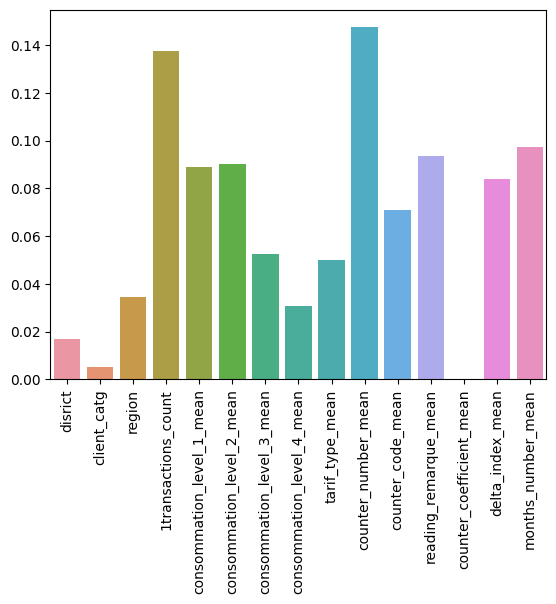

In [21]:
sns.barplot(x=X.columns, y=tree.feature_importances_)
plt.xticks(rotation=90)

### SVM

In [22]:
#support vector machine
#vec = SVC(kernel='linear', C=1, gamma='auto')
#model_list.append(vec)
#vec.fit(X_train.iloc[:1500], y_train.iloc[:1500])
#y_pred_vec = vec.predict(X_test)
#y_proba = vec.predict_proba(X_test)
#print(roc_auc_score(y_test, vec.predict_proba(X_test)[:, 1]))
#print(classification_report(y_test, y_pred_vec))


### Naive Bayes

In [23]:
#Naive Bayes
gnb = GaussianNB()
model_list.append(gnb)
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
#y_proba = gnb.predict_proba(X_test)
print(roc_auc_score(y_test, gnb.predict_proba(X_test)[:, 1]))
print(classification_report(y_test, y_pred_gnb))

0.5681234488735594
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97     24160
         1.0       0.00      0.00      0.00      1513

    accuracy                           0.94     25673
   macro avg       0.47      0.50      0.48     25673
weighted avg       0.89      0.94      0.91     25673



## First model: Random Forest

### 100 trees, sqrt features

In [24]:
"""
rf = RandomForestClassifier(n_estimators=100, random_state=42, max_features = 'sqrt', n_jobs=-1, verbose = 1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
#y_proba = tree.predict_proba(X_test)
print(roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]))
print(classification_report(y_test, y_pred_rf))
"""


"\nrf = RandomForestClassifier(n_estimators=100, random_state=42, max_features = 'sqrt', n_jobs=-1, verbose = 1)\nrf.fit(X_train, y_train)\ny_pred_rf = rf.predict(X_test)\n#y_proba = tree.predict_proba(X_test)\nprint(roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]))\nprint(classification_report(y_test, y_pred_rf))\n"

### 500 trees

In [25]:
'''
rf = RandomForestClassifier(n_estimators=500, random_state=42, max_features = 'sqrt', n_jobs=-1, verbose = 1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
#y_proba = tree.predict_proba(X_test)
print(roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]))
print(classification_report(y_test, y_pred_rf))
'''


"\nrf = RandomForestClassifier(n_estimators=500, random_state=42, max_features = 'sqrt', n_jobs=-1, verbose = 1)\nrf.fit(X_train, y_train)\ny_pred_rf = rf.predict(X_test)\n#y_proba = tree.predict_proba(X_test)\nprint(roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]))\nprint(classification_report(y_test, y_pred_rf))\n"

### 500 trees, sqrt features, class balancing

In [26]:
"""
rf = RandomForestClassifier(n_estimators=500, random_state=42, max_features = 'sqrt', n_jobs=-1, verbose = 1, class_weight='balanced')
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
#y_proba = tree.predict_proba(X_test)
print(roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]))
print(classification_report(y_test, y_pred_rf))
"""


"\nrf = RandomForestClassifier(n_estimators=500, random_state=42, max_features = 'sqrt', n_jobs=-1, verbose = 1, class_weight='balanced')\nrf.fit(X_train, y_train)\ny_pred_rf = rf.predict(X_test)\n#y_proba = tree.predict_proba(X_test)\nprint(roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]))\nprint(classification_report(y_test, y_pred_rf))\n"

### 500 trees, all features

In [27]:
"""
rf = RandomForestClassifier(n_estimators=500, random_state=42, max_features = None, n_jobs=-1, verbose = 1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
#y_proba = tree.predict_proba(X_test)
print(roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]))
print(classification_report(y_test, y_pred_rf))
"""


'\nrf = RandomForestClassifier(n_estimators=500, random_state=42, max_features = None, n_jobs=-1, verbose = 1)\nrf.fit(X_train, y_train)\ny_pred_rf = rf.predict(X_test)\n#y_proba = tree.predict_proba(X_test)\nprint(roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]))\nprint(classification_report(y_test, y_pred_rf))\n'

### Drop some unimportant features

In [28]:
#sns.barplot(x=X_train.columns, y=rf.feature_importances_)
#plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'disrict'),
  Text(1, 0, 'client_catg'),
  Text(2, 0, 'region'),
  Text(3, 0, '1transactions_count'),
  Text(4, 0, 'consommation_level_1_mean'),
  Text(5, 0, 'consommation_level_2_mean'),
  Text(6, 0, 'consommation_level_3_mean'),
  Text(7, 0, 'consommation_level_4_mean'),
  Text(8, 0, 'tarif_type_mean'),
  Text(9, 0, 'counter_number_mean'),
  Text(10, 0, 'counter_code_mean'),
  Text(11, 0, 'reading_remarque_mean'),
  Text(12, 0, 'counter_coefficient_mean'),
  Text(13, 0, 'delta_index_mean'),
  Text(14, 0, 'months_number_mean')])

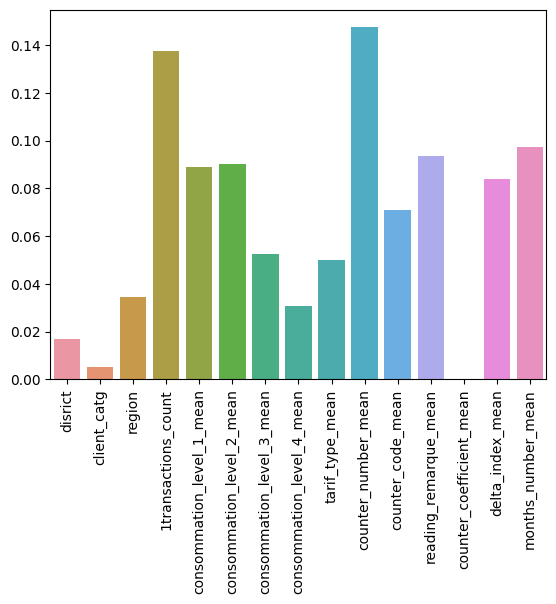

In [29]:
sns.barplot(x=X.columns, y=tree.feature_importances_)
plt.xticks(rotation=90)

In [30]:
X_train.columns

Index(['disrict', 'client_catg', 'region', '1transactions_count',
       'consommation_level_1_mean', 'consommation_level_2_mean',
       'consommation_level_3_mean', 'consommation_level_4_mean',
       'tarif_type_mean', 'counter_number_mean', 'counter_code_mean',
       'reading_remarque_mean', 'counter_coefficient_mean', 'delta_index_mean',
       'months_number_mean'],
      dtype='object')

#### Maybe dropping unimportant features

In [31]:
#X_train.drop(['disrict', 'client_catg', 'region', 'consommation_level_4_mean', 'tarif_type_mean'], axis=1, inplace=True)
#X_test.drop(['disrict', 'client_catg', 'region', 'consommation_level_4_mean', 'tarif_type_mean'], axis=1, inplace=True)

No drop in f1-score... but we still don't now if it is a good idea to keep on dropping further. 

### Single tree with limited depth 3 to verify feature importance plot

In [32]:
#Decision Tree
tree = DecisionTreeClassifier(criterion = "gini", max_depth=2) 
model_list.append(tree)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
#y_proba = tree.predict_proba(X_test)
print(roc_auc_score(y_test, tree.predict_proba(X_test)[:, 1]))
print(classification_report(y_test, y_pred_tree))

0.6721200615635793
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97     24160
         1.0       0.00      0.00      0.00      1513

    accuracy                           0.94     25673
   macro avg       0.47      0.50      0.48     25673
weighted avg       0.89      0.94      0.91     25673



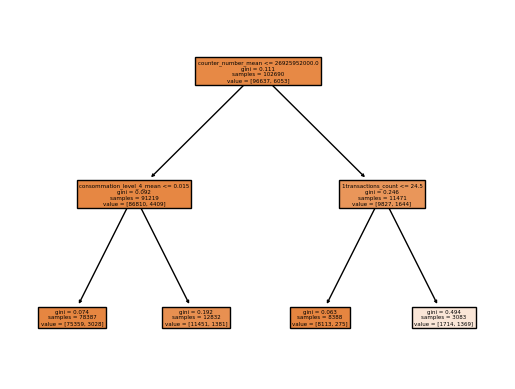

In [33]:
dectree_plot = plot_tree(tree, feature_names=X_train.columns, filled=True)

## Optimizing our first model: Decision Tree

In [34]:
'''params_dict = {
    'criterion' : ['gini', 'entropy'], 
    'max_depth': [10, 20, 30, 40, 50, None],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [5, 10, 15],
    'min_samples_split': [20, 50, 100],
}

rgs = RandomizedSearchCV(estimator=tree, param_distributions=params_dict, n_iter=50, scoring='f1', n_jobs=-1, random_state=16, return_train_score=True, verbose=2)
rgs.fit(X_train, y_train)
rgs.best_estimator_, rgs.best_score_'''


"params_dict = {\n    'criterion' : ['gini', 'entropy'], \n    'max_depth': [10, 20, 30, 40, 50, None],\n    'max_features': ['auto', 'sqrt'],\n    'min_samples_leaf': [5, 10, 15],\n    'min_samples_split': [20, 50, 100],\n}\n\nrgs = RandomizedSearchCV(estimator=tree, param_distributions=params_dict, n_iter=50, scoring='f1', n_jobs=-1, random_state=16, return_train_score=True, verbose=2)\nrgs.fit(X_train, y_train)\nrgs.best_estimator_, rgs.best_score_"

### Further opimization: Random Forest

In [35]:
'''rf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=30, max_features='sqrt', min_samples_leaf=5,
                        min_samples_split=20, n_jobs=-1, verbose = 1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
#y_proba = tree.predict_proba(X_test)
print(roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]))
print(classification_report(y_test, y_pred_rf))'''

"rf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=30, max_features='sqrt', min_samples_leaf=5,\n                        min_samples_split=20, n_jobs=-1, verbose = 1)\nrf.fit(X_train, y_train)\ny_pred_rf = rf.predict(X_test)\n#y_proba = tree.predict_proba(X_test)\nprint(roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]))\nprint(classification_report(y_test, y_pred_rf))"

### RandomizedSearchCV on Random Forest

In [36]:
'''params_dict = {
    'n_estimators' : [50, 100, 500], 
    'criterion' : ['gini', 'entropy'], 
    'max_depth': [10, 20, 30, 40, 50, None],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [5, 10, 15],
    'min_samples_split': [20, 50, 100],
}

rgs = RandomizedSearchCV(estimator=rf, param_distributions=params_dict, n_iter=50, scoring='f1', n_jobs=-1, random_state=16, return_train_score=True, verbose=2)
rgs.fit(X_train, y_train)
rgs.best_estimator_, rgs.best_score_'''

"params_dict = {\n    'n_estimators' : [50, 100, 500], \n    'criterion' : ['gini', 'entropy'], \n    'max_depth': [10, 20, 30, 40, 50, None],\n    'max_features': ['auto', 'sqrt'],\n    'min_samples_leaf': [5, 10, 15],\n    'min_samples_split': [20, 50, 100],\n}\n\nrgs = RandomizedSearchCV(estimator=rf, param_distributions=params_dict, n_iter=50, scoring='f1', n_jobs=-1, random_state=16, return_train_score=True, verbose=2)\nrgs.fit(X_train, y_train)\nrgs.best_estimator_, rgs.best_score_"

result: 

(RandomForestClassifier(criterion='entropy', max_depth=30, max_features='sqrt',
                        min_samples_leaf=10, min_samples_split=20,
                        n_estimators=50, n_jobs=-1, random_state=42, verbose=1),
 0.1483850191554762)
 It took 23 min to run. 

In [38]:
from xgboost import XGBClassifier
#dtrain=xgb.DMatrix(X_train, label=y_train)
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred_xgb=model.predict(X_test)
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97     24160
         1.0       0.55      0.14      0.23      1513

    accuracy                           0.94     25673
   macro avg       0.75      0.57      0.60     25673
weighted avg       0.92      0.94      0.93     25673



In [ ]:


params = { 'max_depth': [3, 5, 6, 10, 15, 20],
           'learning_rate': [0.01, 0.1, 0.2, 0.3],
           'subsample': np.arange(0.5, 1.0, 0.1),
           'colsample_bytree': np.arange(0.4, 1.0, 0.1),
           'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
           'n_estimators': [100, 500]}
clf = RandomizedSearchCV(estimator=XGBClassifier(),
                         param_distributions=params,
                         scoring='f1',
                         n_iter=50,
                         n_jobs=-1,
                         verbose=1)
clf.fit(X_train, y_train)
print("Best parameters:", clf.best_params_)
print("f1", clf.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters: {'subsample': 0.7999999999999999, 'n_estimators': 500, 'max_depth': 5, 'learning_rate': 0.3, 'colsample_bytree': 0.8999999999999999, 'colsample_bylevel': 0.4}
f1 0.23321718823006926

In [47]:

from sklearn.metrics import confusion_matrix
model=clf.best_estimator_
y_pred_best=model.predict(X_test)
cm=confusion_matrix(y_test, y_pred_best)
print(classification_report(y_test, y_pred_best), cm)


              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97     24160
         1.0       0.52      0.15      0.24      1513

    accuracy                           0.94     25673
   macro avg       0.73      0.57      0.60     25673
weighted avg       0.92      0.94      0.93     25673
 [[23943   217]
 [ 1281   232]]


In [39]:
from sklearn.ensemble import AdaBoostClassifier
model=AdaBoostClassifier()
model.fit(X_train, y_train)
y_pred_ada=model.predict(X_test)
print(classification_report(y_test, y_pred_ada))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97     24160
         1.0       0.41      0.05      0.08      1513

    accuracy                           0.94     25673
   macro avg       0.67      0.52      0.53     25673
weighted avg       0.91      0.94      0.92     25673



In [41]:

from logitboost import LogitBoost
model=LogitBoost()
model.fit(X_train, y_train)
y_pred_logit=model.predict(X_test)
print(classification_report(y_test, y_pred_logit))

              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97     24160
         1.0       0.57      0.12      0.20      1513

    accuracy                           0.94     25673
   macro avg       0.76      0.56      0.59     25673
weighted avg       0.93      0.94      0.93     25673

